In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
TOKEN_SPAM_PROB_FILE = "03_Testing/prob-spam.txt"
TOKEN_HAM_PROB_FILE = "03_Testing/prob-ham.txt"
TOKEN_ALL_PROB_FILE = "03_Testing/prob-all.txt"

TEST_FEATURE_MATRIX = "03_Testing/test-feature.txt"
TEST_TARGET_FILE = "03_Testing/test-target.txt"

PROB_SPAM = 0.3116

In [6]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

# Calculate P(Spam | Token) and P(Ham | Token)

In [7]:
# joint_log_spam = X_test.dot(np.log(prob_token_spam)-np.log(prob_token_all)+np.log(PROB_SPAM))
# joint_log_ham = X_test.dot(np.log(prob_token_ham)-np.log(prob_token_all)+np.log(1-PROB_SPAM))
joint_log_spam = X_test.dot(np.log(prob_token_spam)+np.log(PROB_SPAM))
joint_log_ham = X_test.dot(np.log(prob_token_ham)+np.log(1-PROB_SPAM))

In [8]:
predictions = (joint_log_spam > joint_log_ham)*1

# Metrics and Evaluation

In [9]:
correct_docs = (predictions==y_test).sum()
accuracy = correct_docs/X_test.shape[0]
print(accuracy)

0.7697215777262181


# Visualization

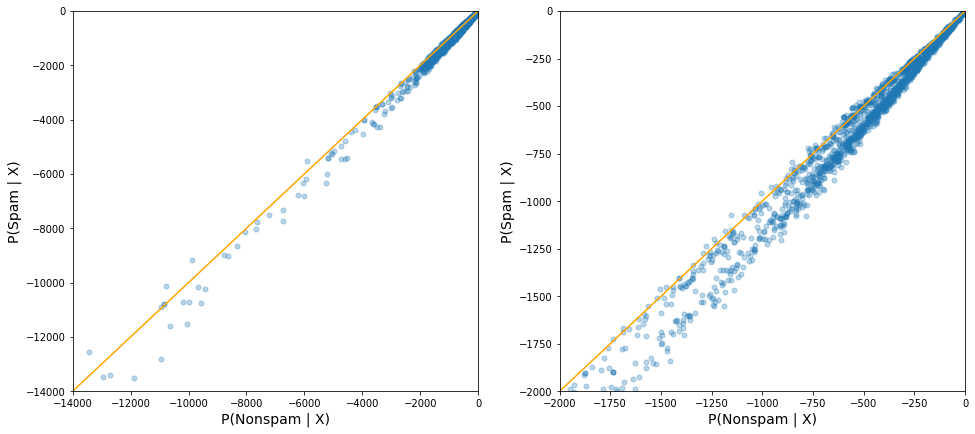

In [10]:
y_axis_label = "P(Spam | X)"
x_axis_label = "P(Nonspam | X)"
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.xlabel(x_axis_label, fontsize=14)
plt.ylabel(y_axis_label, fontsize=14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
linedata = np.linspace(start=-14000, stop=1, num=1000)
plt.plot(linedata, linedata, color='orange')
plt.scatter(joint_log_ham, joint_log_spam, alpha=0.3, s=25)

plt.subplot(1,2,2)
plt.xlabel(x_axis_label, fontsize=14)
plt.ylabel(y_axis_label, fontsize=14)
plt.xlim([-2000,1])
plt.ylim([-2000,1])
linedata = np.linspace(start=-14000, stop=1, num=1000)
plt.plot(linedata, linedata, color='orange')
plt.scatter(joint_log_ham, joint_log_spam, alpha=0.3, s=25)

C:\Users\Srivinay Tummarakota\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


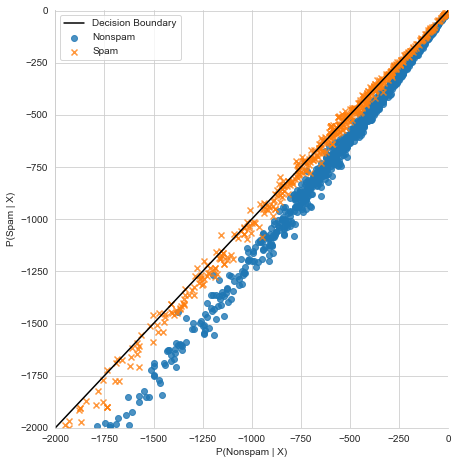

In [11]:
# Chart Styling
sns.set_style("whitegrid")
labels = 'Actual Category'

summary_df = pd.DataFrame({y_axis_label: joint_log_spam, x_axis_label: joint_log_ham, labels:y_test})
sns.lmplot(x=x_axis_label, y=y_axis_label, data=summary_df, size=6.5, fit_reg=False, scatter={'alpha':0.5, 's':25}, 
           hue=labels, markers=['o', 'x'], legend=False)
plt.xlim([-2000,1])
plt.ylim([-2000,1])

linedata = np.linspace(start=-14000, stop=1, num=1000)
plt.plot(linedata, linedata, color='black')
plt.legend(("Decision Boundary", "Nonspam", "Spam"))

In [23]:
true_pos = (y_test==1) & (predictions==1) # 192
false_pos = (y_test==0) & (predictions==1) # 0
true_neg = (y_test==0) & (predictions==0) # 1135
false_neg = (y_test==1) & (predictions==0) # 397

In [27]:
recall_score = true_pos.sum()/(true_pos.sum()+false_neg.sum()) # .326
precision_score = true_pos.sum()/(true_pos.sum()+false_pos.sum()) # 1.0

1.0

In [29]:
f1_score = 2*(precision_score*recall_score)/(precision_score+recall_score) # .4916